<font color='PaleVioletRed'> 
# Mushroom Classifier
This notebook is a learning tool using the UCI machine learning repository dataset on mushrooms. The goal of this project is to examine the mushroom dataset and build a classifier to predict if a mushroom's physical attribute (as labeled in the dataset) determines whether it is edible or poisonous. 
- Dataset source: https://archive.ics.uci.edu/ml/datasets/mushroom

<font color='PaleVioletRed'> 
### Load Mushroom Dataset

In [186]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

In [187]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(url, header=None, names=column_names)

<font color='PaleVioletRed'> 
### Exploratory Data Analysis

In [257]:
df.shape

(8124, 23)

In [258]:
df.describe() 

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<font color='MediumVioletRed'>
There are 22 attributes and one class - edible or poisonous - in the dataset. It does not consist of numerical features, but categorical features represented by a single letter to denote a physical feature of the mushroom. This will play into how we featureize the dataset later when building a classifier to determine the edibility of different mushroom types. 

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<font color='MediumVioletRed'>
The class is fairly evening distributed between edible and poisonous.

In [6]:
df['cap-color'].value_counts(normalize=True)*100 #run value counts on one of the features

n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.772526
c     0.541605
u     0.196947
r     0.196947
Name: cap-color, dtype: float64

(<Figure size 1440x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa7bc674f98>)

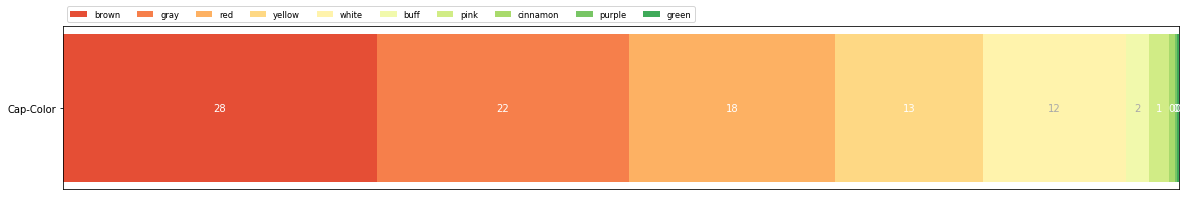

In [8]:
#plot text data into stacked chart equal to 100% distribution
import numpy as np
import matplotlib.pyplot as plt


category_names = ['brown','gray','red','yellow','white','buff','pink','cinnamon','purple','green']
results = {
    'Cap-Color': [28.105380,22.651730,18.466084,13.197095,12.803152,2.068201,1.772744,0.541672,0.196972,0.196972],}
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)

<font color='MediumVioletRed'>

#### Categories by Feature

In [7]:
categories = {'class': {'e':'edibile', 'p':'posionous'},
                'cap-shape': {'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
                'cap-surface': {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}, 
                'cap-color': {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
                'bruises': {'t':'bruises','f':'no'}, 
                'odor': {'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
                'gill-attachment': {'a':'attached','d':'descending','f':'free','n':'notched'},
                'gill-spacing': {'c':'close','w':'crowded','d':'distant'},
                'gill-size':{'b':'broad','n':'narrow'},
                'gill-color':{'k':'black','o':'orange','n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
                'stalk-shape':{'e':'enlarging','t':'tapering'},
                'stalk-root':{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
                'stalk-surface-above-ring':{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
                'stalk-surface-below-ring':{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
                'stalk-color-above-ring':{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
                'stalk-color-below-ring':{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
                'veil-type':{'p':'partial','u':'universal'},
                'veil-color':{'o':'orange','n':'brown','w':'white','y':'yellow'},
                'ring-number':{'n':'none','o':'one','t':'two'},
                'ring-type':{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
                'spore-print-color':{'k':'black','n':'brown','b':'buff', 'h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
                'population':{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
                'habitat':{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'},
             }

<font color='MediumVioletRed'>

By constructing a groupby for each feature, we find the following insights:
    
- For the cap shape, only edible mushrooms have a sunken (s feature) shape and only poisonous mushrooms have a conical (c feature) shape.
- For the cap surface, only poisonous mushrooms have grooves (s feature) on the cap surface, but there are only 4 instances so it is not likely a strong indicator of class. 
- For the cap color, only edible mushrooms are green and purple (r and u features) in color, but their instances are low as well.
- Bruises have only two attributes that are somewhat evenly distributed between edible and poinsonous, so this feature is not likely a strong influencer of class. This is the same for gill attachment,gill spacing, gill size, stalk shape, and stalk shape.
- For the odor, only edible mushrooms smell of almond and anise (a and l features) and only poisonous mushrooms creosote, foul, musty, pungent, fishy, spicey, or have no odor smell.
- For gill color, buff and green colors (b and r features) are only poisonous, and red and orange colors (e and o featues) are only edible but have a smaller set of instances. B is the strongest indicator in gill color. 
- For stalk root, a rooted stalk (r feature) is only edible. This feature has missing values that were imputed with '?' in the datasset. 
- For stalk color above and below the ring, buff, cinnamon, and yellow colors (b,c, and y features) are only poisonous, and red, gray, and orange colors (e, g, and o features) are only edible. 
- Veil type has only one attribute, so this is not an indicator of class. This feature can be removed from the dataset as it does not impact class prediction.
- For veil color, brown and orange colors (n and o features) are only edible and yellow color (y feature) is only poisonous.
- For ring number, haing no rings (n feature) is only poisonous.
- For ring type, large or no rings (l and n features) are only poisonous and flaring rings (f feature) are only edible.
- For spore print color, buff, chocolate, purple, organge, and yellow colors (b,h,o,u, and y features) are only edible and green color (r feature) is only poisonous.
- For population, abundant and numerous (a and n feature) are only edible.
- For habitat, in waste (w feature) is only edible.

What this indicates is that some features are stronger indicators of the edibility class.

cap-shape,b,c,f,k,s,x
class,,,,,,
e,404.0,0.0,1596.0,228.0,32.0,1948.0
p,48.0,4.0,1556.0,600.0,0.0,1708.0


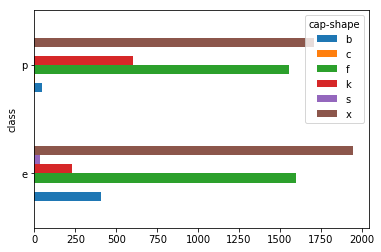

In [9]:
capShape = df.groupby('class')['cap-shape'].value_counts().unstack().fillna(0)
display(capShape)
capShape.plot.barh()

cap-surface,f,g,s,y
class,,,,
e,1560.0,0.0,1144.0,1504.0
p,760.0,4.0,1412.0,1740.0


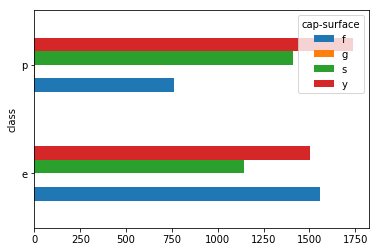

In [10]:
capSurface = df.groupby('class')['cap-surface'].value_counts().unstack().fillna(0)
display(capSurface)
capSurface.plot.barh()

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,48.0,32.0,624.0,1032.0,1264.0,56.0,16.0,16.0,720.0,400.0
p,120.0,12.0,876.0,808.0,1020.0,88.0,0.0,0.0,320.0,672.0


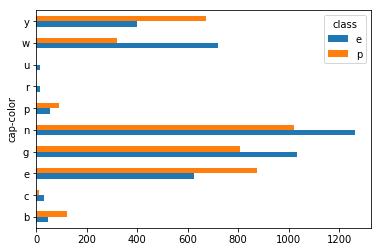

In [11]:
capColor = df.groupby('class')['cap-color'].value_counts().unstack().fillna(0)
display(capColor)
df.groupby('class')['cap-color'].value_counts().unstack(0).fillna(0).plot.barh() #0 in unstack switches the features on the plot axis

bruises?,f,t
class,,
e,1456,2752
p,3292,624


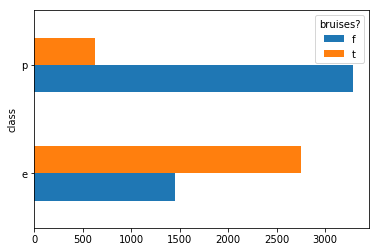

In [12]:
bruises = df.groupby('class')['bruises?'].value_counts().unstack().fillna(0)
display(bruises)
bruises.plot.barh()

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400.0,0.0,0.0,400.0,0.0,3408.0,0.0,0.0,0.0
p,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0


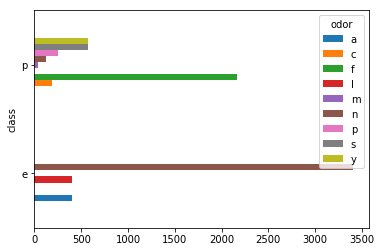

In [13]:
odor = df.groupby('class')['odor'].value_counts().unstack().fillna(0)
display(odor)
odor.plot.barh()

gill-attachment,a,f
class,,
e,192,4016
p,18,3898


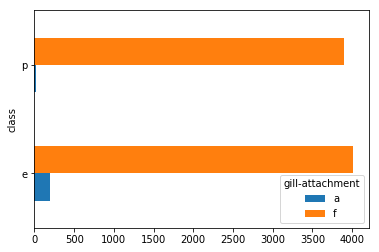

In [20]:
gillAttachment = df.groupby('class')['gill-attachment'].value_counts().unstack().fillna(0)
display(gillAttachment)
gillAttachment.plot.barh()

gill-spacing,c,w
class,,
e,3008,1200
p,3804,112


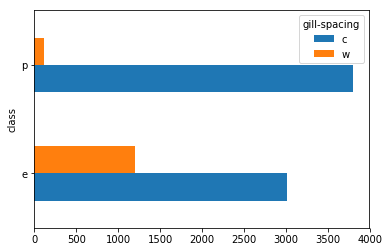

In [4]:
gillSpacing = df.groupby('class')['gill-spacing'].value_counts().unstack().fillna(0)
display(gillSpacing)
gillSpacing.plot.barh()

gill-size,b,n
class,,
e,3920,288
p,1692,2224


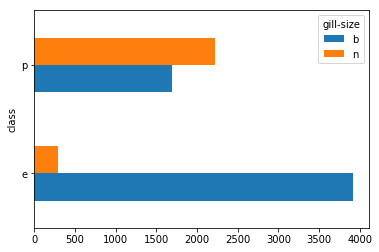

In [5]:
gillSize = df.groupby('class')['gill-size'].value_counts().unstack().fillna(0)
display(gillSize)
gillSize.plot.barh()

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0.0,96.0,248.0,204.0,344.0,936.0,64.0,852.0,0.0,444.0,956.0,64.0
p,1728.0,0.0,504.0,528.0,64.0,112.0,0.0,640.0,24.0,48.0,246.0,22.0


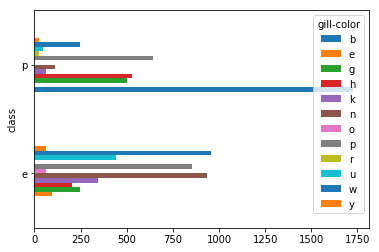

In [6]:
gillColor = df.groupby('class')['gill-color'].value_counts().unstack().fillna(0)
display(gillColor)
gillColor.plot.barh()

stalk-shape,e,t
class,,
e,1616,2592
p,1900,2016


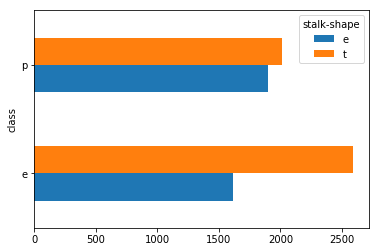

In [7]:
stalkShape = df.groupby('class')['stalk-shape'].value_counts().unstack().fillna(0)
display(stalkShape)
stalkShape.plot.barh()

stalk-root,?,b,c,e,r
class,,,,,
e,720.0,1920.0,512.0,864.0,192.0
p,1760.0,1856.0,44.0,256.0,0.0


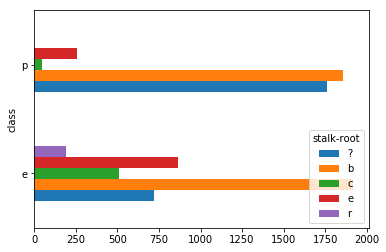

In [8]:
stalkRoot = df.groupby('class')['stalk-root'].value_counts().unstack().fillna(0)
display(stalkRoot)
stalkRoot.plot.barh()

stalk-surface-above-ring,f,k,s,y
class,,,,
e,408,144,3640,16
p,144,2228,1536,8


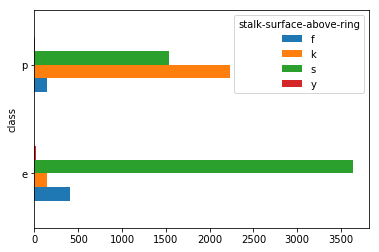

In [9]:
stalkSurface_above = df.groupby('class')['stalk-surface-above-ring'].value_counts().unstack().fillna(0)
display(stalkSurface_above)
stalkSurface_above.plot.barh()

stalk-surface-below-ring,f,k,s,y
class,,,,
e,456,144,3400,208
p,144,2160,1536,76


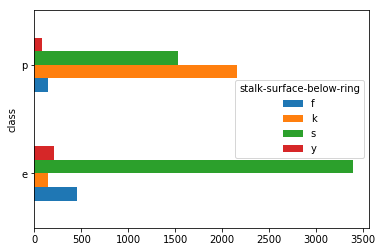

In [10]:
stalkSurface_below = df.groupby('class')['stalk-surface-below-ring'].value_counts().unstack().fillna(0)
display(stalkSurface_below)
stalkSurface_below.plot.barh()

stalk-color-above-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.0,0.0,96.0,576.0,16.0,192.0,576.0,2752.0,0.0
p,432.0,36.0,0.0,0.0,432.0,0.0,1296.0,1712.0,8.0


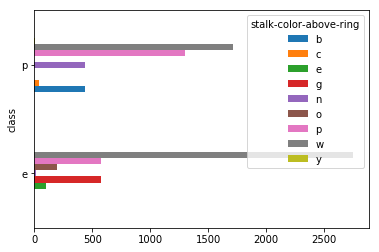

In [11]:
stalkColor_above = df.groupby('class')['stalk-color-above-ring'].value_counts().unstack().fillna(0)
display(stalkColor_above)
stalkColor_above.plot.barh()

stalk-color-below-ring,b,c,e,g,n,o,p,w,y
class,,,,,,,,,
e,0.0,0.0,96.0,576.0,64.0,192.0,576.0,2704.0,0.0
p,432.0,36.0,0.0,0.0,448.0,0.0,1296.0,1680.0,24.0


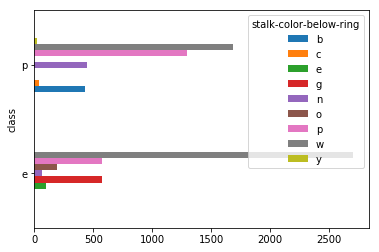

In [12]:
stalkColor_below = df.groupby('class')['stalk-color-below-ring'].value_counts().unstack().fillna(0)
display(stalkColor_below)
stalkColor_below.plot.barh()

veil-type,p
class,
e,4208
p,3916


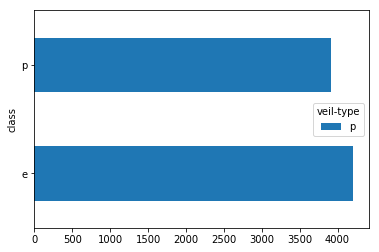

In [13]:
veilType = df.groupby('class')['veil-type'].value_counts().unstack().fillna(0)
display(veilType)
veilType.plot.barh()

veil-color,n,o,w,y
class,,,,
e,96.0,96.0,4016.0,0.0
p,0.0,0.0,3908.0,8.0


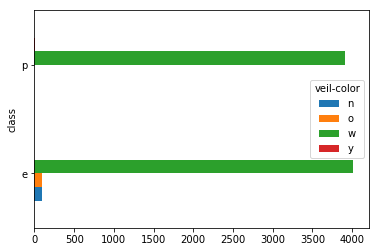

In [14]:
veilColor = df.groupby('class')['veil-color'].value_counts().unstack().fillna(0)
display(veilColor)
veilColor.plot.barh()

ring-number,n,o,t
class,,,
e,0.0,3680.0,528.0
p,36.0,3808.0,72.0


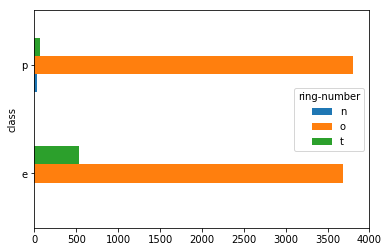

In [15]:
ringNumber = df.groupby('class')['ring-number'].value_counts().unstack().fillna(0)
display(ringNumber)
ringNumber.plot.barh()

ring-type,e,f,l,n,p
class,,,,,
e,1008.0,48.0,0.0,0.0,3152.0
p,1768.0,0.0,1296.0,36.0,816.0


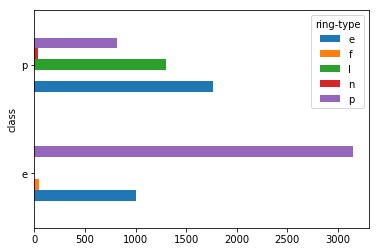

In [16]:
ringType = df.groupby('class')['ring-type'].value_counts().unstack().fillna(0)
display(ringType)
ringType.plot.barh()

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,48.0,48.0,1648.0,1744.0,48.0,0.0,48.0,576.0,48.0
p,0.0,1584.0,224.0,224.0,0.0,72.0,0.0,1812.0,0.0


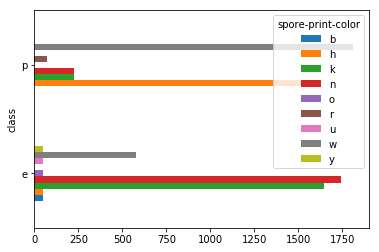

In [17]:
sporePrint_color = df.groupby('class')['spore-print-color'].value_counts().unstack().fillna(0)
display(sporePrint_color)
sporePrint_color.plot.barh()

population,a,c,n,s,v,y
class,,,,,,
e,384.0,288.0,400.0,880.0,1192.0,1064.0
p,0.0,52.0,0.0,368.0,2848.0,648.0


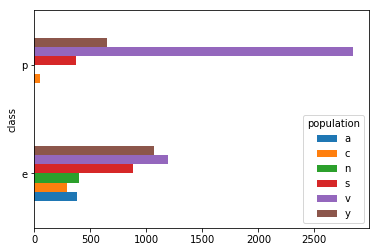

In [18]:
population = df.groupby('class')['population'].value_counts().unstack().fillna(0)
display(population)
population.plot.barh()

habitat,d,g,l,m,p,u,w
class,,,,,,,
e,1880.0,1408.0,240.0,256.0,136.0,96.0,192.0
p,1268.0,740.0,592.0,36.0,1008.0,272.0,0.0


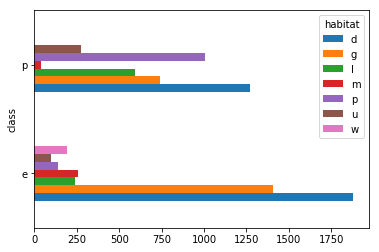

In [19]:
habitat = df.groupby('class')['habitat'].value_counts().unstack().fillna(0)
display(habitat)
habitat.plot.barh()

<font color='MediumVioletRed'>
Odor so far is the most interesting as the categories are either 100% edible or 100% poisonous. This will be interesting to see how it plays out when we build the classifier. We will also drop the veil type as it has only one category across all instances in this dataset, so it is not useful in predcting class.

In [193]:
df.drop(columns=['veil-type'], inplace=True)

<font color='MediumVioletRed'>

#### Correlation Tests

In [28]:
#encode all column features into array
df_enc = pd.get_dummies(df)

In [29]:
df_enc.corr(method ='pearson')

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class_e,1.000000,-1.000000,0.182567,-0.023007,-0.018526,-0.163565,0.060664,0.026886,0.195415,-0.023007,...,0.159572,-0.443722,0.107055,0.126123,0.165004,-0.155150,0.138627,-0.323346,-0.112078,0.150087
class_p,-1.000000,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
cap-shape_b,0.182567,-0.182567,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,-0.023007,0.023007,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.018526,0.018526,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.163565,0.163565,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,...,-0.089360,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_s,0.060664,-0.060664,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,...,-0.026791,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
cap-shape_x,0.026886,-0.026886,-0.219564,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,0.063511,-0.020077,...,0.059264,-0.060421,0.044626,0.071773,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493
cap-surface_f,0.195415,-0.195415,-0.091638,-0.014032,0.064801,-0.158942,0.099464,0.063511,1.000000,-0.014032,...,-0.033553,-0.116485,0.210552,0.190756,0.080694,-0.191987,-0.122077,-0.086727,-0.011913,-0.098365
cap-surface_g,-0.023007,0.023007,0.018820,0.249631,-0.006285,0.010863,-0.001396,-0.020077,-0.014032,1.000000,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453


In [18]:
#testing single features against class
df['class'].corr(df['odor'])

-0.0935516440240362

In [13]:
df['class'].corr(df['stalk-root'])

-0.3793609848063973

In [12]:
df[['class','stalk-root']].corr()

,class,stalk-root
class,1.000000,-0.379361
stalk-root,-0.379361,1.000000


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


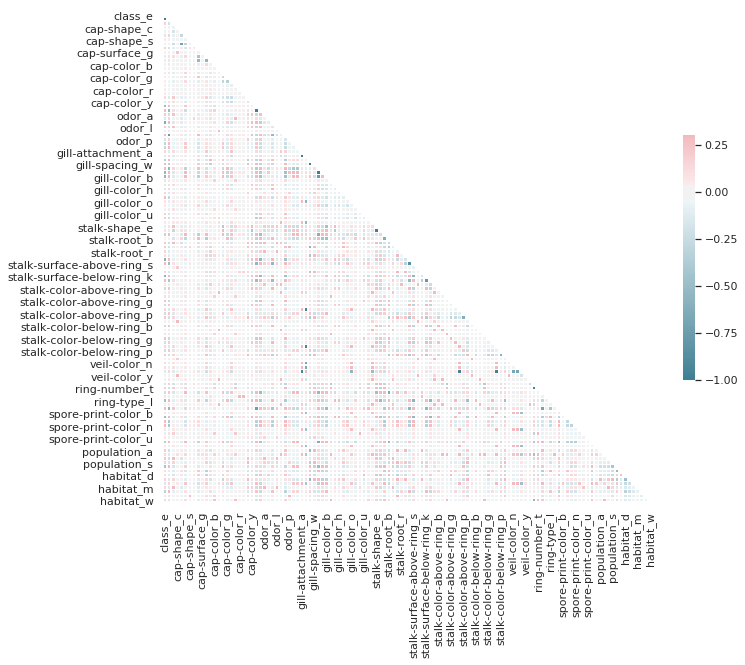

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_enc.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<font color='MediumVioletRed'>
Since the mushroom dataset has categorical features, we need to use one hot encoding to convert the categories into numerical attribtues in order to run a Pearson R correlation test on all the features. However, this renders an extra large matrix that expanded 22 features to 112 that does not fully capture useful insights about feature correlation due to the encoding. Therefore, we switch to a Theil's U below to calculate the correlation coefficient without one-hot encoding the features.

In [5]:
import pandas as pd
from dython import nominal

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


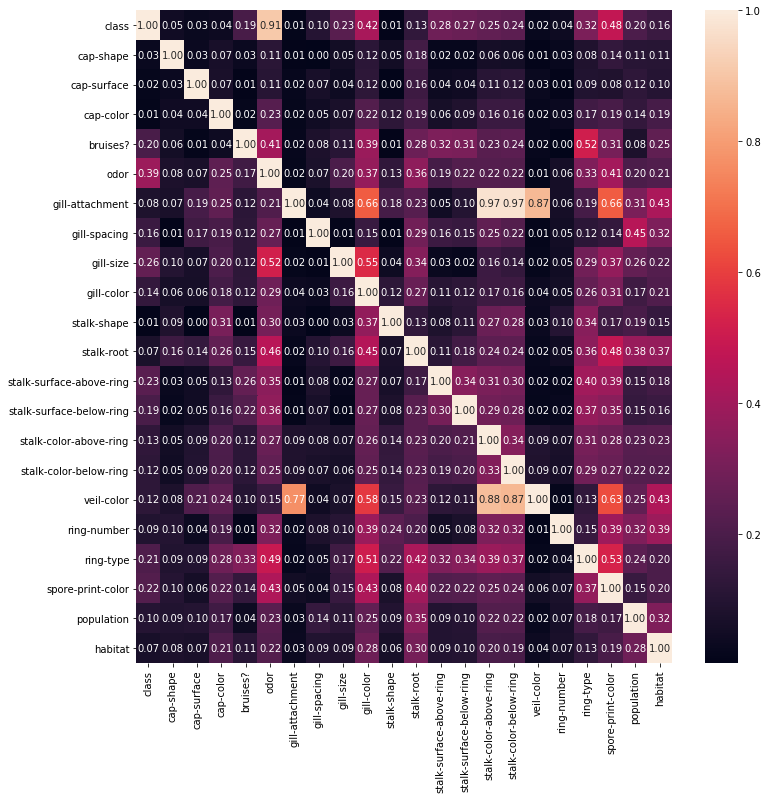

In [89]:
nominal.associations(df, theil_u=True, nominal_columns='all', figsize=(12,12))

Resource: Theil's U heatmap citation: https://github.com/shakedzy/dython 

<font color='MediumVioletRed'>
Fortunately, Dython on GitHub already created a Theil's U correlation matrix and heat map visualization. From this, we can see that odor is the top indicator of class at 0.91 correlation coefficient, followed by spore print color 0.48 and gill color 0.42.

<font color='PaleVioletRed'> 
### Prepare Data for Modeling

In [12]:
df.isnull().sum() #search for missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<font color='MediumVioletRed'>
It would appear that there are no empty cells. However, the data description indicates that one of the features has missing values; stalk root has missing data labeled as '?' in the dataset. When we run value counts, we find that 2480 mushrooms have missing values, which is a 30% large share of the total 8124 data. Deleting missing values results in a more accurate prediction model, if there is enough data (70-75%) of the remaining dataset. However, removing 30% could result in a less accurate prediction model by loss of significant data.

<font color='PaleVioletRed'> 
Dealing with missing data:
- Delete rows: if the loss is less than 30% of the entire dataset (discussed above)
- Replace with mean/median/mode: works on smaller, numerical datasets, but can add bias. The mushroom dataset, however, is categorial so this soolution doesn't fit this dataset.
- Assign a unique category: good for categorical datasets, which the missing values were replaced with '?' to fill in empty cells. This negates a loss of data, but it adds less variance by introducing another feature which can result in poor performance of the prediction model.
- Predict the missing values: use sklearn's linear regression model to predict the missing values. This is good unless the missing value is expected to have a high variance. However, some bias arises from an incomplete dataset and the predicted alues are only viewed as a proxy. 
- Use prediction algorithm that supports missing values: the Randon Forest model is the best option as it works well on non-linear and categorical data. It takes into account the high variance / or bias, working well on large datasets. The drawback is it can be time consuming. 

In [13]:
df['stalk-root'].value_counts() #find the missing values with the categorical feature '?'

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

<font color='MediumVioletRed'>
Therefore, we will keep the missing data that has been replaced with the categorical feature '?' and start with the Random Forest algorithm. 
    
As mentioned before, the feautres in the dataset are categories, not numbers. Thus the encoding process to prepare the data for machine learning has an extra step. If the features were all numbers, we could encode the features directly into an array.

<font color='PaleVioletRed'> 
### Encode Labels

<font color='MediumVioletRed'>

#### Using Label Encoder

In [161]:
df1=df

In [162]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#encode all column features into array
for col in df1.columns:
    df1[col]=le.fit_transform(df1[col])  

In [163]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<font color='MediumVioletRed'>
All data needs to be encoded into an array for the mathematic calculations in a prediction model. Textual and categorical data also need to be encoded with numbers. In DF1, we encode using sklearn's Label Encoder for the purpse of comparison. However, the purple cap color is not worth 5x the value of the brown color. As an alternative, we will use .get_dummies to encode categorical data and compare against the label encoding.

In [164]:
y=df1['class']
X=df1.iloc[:,1:23]

In [165]:
display(X.shape)
display(y.shape)

(8124, 22)

(8124,)

<font color='PaleVioletRed'> 
### Split Data into Train and Test Groups

In [166]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=109) # 60% training and 40% test

In [167]:
print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (6093, 22)
Training y_train Shape: (6093,)
Testing X_test Shape: (2031, 22)
Testing y_test Shape: (2031,)


<font color='PaleVioletRed'> 
### Random Forest Classification Model

<font color='MediumVioletRed'>

##### Random Forest
Random Forest Classifier was selected as the first classifier in the last section because it works well with categorical data and missing data. In this first example, we will use the categorical data with the missing data filled in with a new category '?'.

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

predicted= clf.predict(X_test) 

In [169]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 1.0


In [170]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [171]:
#set the max depth to 10 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_predict_prob = rf.predict_proba(X_test)

rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)

print(rf_conf_matrix)
print(rf_accuracy_score)

[[1040    0]
 [   0  991]]
1.0


/home/ariggs/myENV/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<font color='MediumVioletRed'>
Random Forest classifier rendered 100% accuracy, so let's cross validate it to explore why.

In [172]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(rf, X_test, y_test, cv=5)

In [173]:
confusion_matrix(y_pred_cv, y_test)

array([[1040,    0],
       [   0,  991]])

In [174]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf, X_train, y_train, cv = 30)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


<font color='MediumVioletRed'>
Let's test the entire dataset now for accuracy.

In [175]:
scores = cross_val_score(rf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.19)


<font color='MediumVioletRed'>

#### Perform one-hot encoding using .get_dummies

In [194]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [195]:
y=df['class'] #segments our target
X=df.iloc[:,1:23] #from rest of the data

In [196]:
X_enc = pd.get_dummies(X)
X_enc.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [197]:
#target uses Label Encoder since we only have two classes
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [198]:
display(X_enc.shape) #renders 117 features, up from 22 -> could lead to overfitting, so need to test this later
display(y_enc.shape)

(8124, 116)

(8124,)

<font color='MediumVioletRed'>

##### Random Forest

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc,y_enc, test_size=0.25,random_state=109) # 60% training and 40% test

print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (6093, 116)
Training y_train Shape: (6093,)
Testing X_test Shape: (2031, 116)
Testing y_test Shape: (2031,)


In [200]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

predicted= clf.predict(X_test) 

In [201]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 1.0


In [202]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [203]:
#set the max depth to 10 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_predict_prob = rf.predict_proba(X_test)

rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)

print(rf_conf_matrix)
print(rf_accuracy_score)

[[1040    0]
 [   0  991]]
1.0


/home/ariggs/myENV/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [204]:
#cross validating again
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(rf, X_test, y_test, cv=5)

In [205]:
confusion_matrix(y_pred_cv, y_test)

array([[1040,    1],
       [   0,  990]])

In [206]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf, X_train, y_train, cv = 30)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


<font color='MediumVioletRed'>
Let's test the entire dataset again.

In [208]:
scores = cross_val_score(rf, X_enc, y_enc, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.19)


<font color='MediumVioletRed'>
Both Random Forest models with different encoding systems rendered 100% accuracy score. When cross validated, the one-hot encoding and label encoding both had an accuracy score of 97%. 

<font color='PaleVioletRed'> 
### Impute Missing Values

In [101]:
df.head() #back to our original dataset

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


<font color='MediumVioletRed'>

##### Pandas Imputer

In [102]:
import numpy as np
df['stalk-root'].replace('?', np.NaN, inplace=True) #replace categorical place holder ? with NaN

In [103]:
df['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [104]:
df['stalk-root'].isnull().sum()

2480

In [109]:
df['stalk-root'].fillna(method='ffill', inplace=True) #replace NaNs with forward (ffill) or backwards (bfill) values ->pandas imputer

<font color='MediumVioletRed'>
Pandas has the option of adding a forward fill or backward fill, meaning it takes the value before or after to fill in the missing values. Since the mushroom dataset has cateogies, this is not the best option as the forward and backward options are choosen at random and the '?' could have a more significant correlation to the other features. For now, we will use forward fill to compare with the imputed '?' category. 

In [110]:
df['stalk-root'].tail()

8119    c
8120    c
8121    c
8122    c
8123    c
Name: stalk-root, dtype: object

In [114]:
y=df['class'] #segments our target
X=df.iloc[:,1:23] #from rest of the data

In [115]:
X_enc = pd.get_dummies(X)

In [116]:
#target uses Label Encoder since we only have two classes
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [118]:
display(X_enc.shape)
display(y_enc.shape)

(8124, 115)

(8124,)

<font color='MediumVioletRed'>

##### Random Forest

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc,y_enc, test_size=0.25,random_state=109) # 60% training and 40% test

print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (6093, 115)
Training y_train Shape: (6093,)
Testing X_test Shape: (2031, 115)
Testing y_test Shape: (2031,)


In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

predicted= clf.predict(X_test) 

In [121]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 1.0


In [122]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [123]:
#set the max depth to 10 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_predict_prob = rf.predict_proba(X_test)

rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)

print(rf_conf_matrix)
print(rf_accuracy_score)

[[1040    0]
 [   0  991]]
1.0


/home/ariggs/myENV/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [124]:
#cross validating 
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(rf, X_test, y_test, cv=5)

confusion_matrix(y_pred_cv, y_test)

array([[1040,    1],
       [   0,  990]])

In [125]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf, X_train, y_train, cv = 30)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


<font color='MediumVioletRed'>
Let's test the entire dataset again.

In [126]:
scores = cross_val_score(rf, X_enc, y_enc, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.18)


<font color='MediumVioletRed'>
Using forward fill for the missing values rendered 100% accuracy with Random Forest classifier and a 97% cross validation score.

<font color='PaleVioletRed'> 
### Model Comparison

<font color='MediumVioletRed'>

##### Logistic Regression

In [127]:
y=df['class'] #segments our target
X=df.iloc[:,1:23] #from rest of the data

In [128]:
X_enc = pd.get_dummies(X)
X_enc.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [129]:
#target uses Label Encoder since we only have two classes
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)

In [130]:
display(X_enc.shape) #renders 117 features, up from 22 -> could lead to overfitting, so need to test this later
display(y_enc.shape)

(8124, 115)

(8124,)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y_enc, test_size=0.25,random_state=109) # 60% training and 40% test

print('Training X_train Shape:', X_train.shape)
print('Training y_train Shape:', y_train.shape)
print('Testing X_test Shape:', X_test.shape)
print('Testing y_test Shape:', y_test.shape)

Training X_train Shape: (6093, 115)
Training y_train Shape: (6093,)
Testing X_test Shape: (2031, 115)
Testing y_test Shape: (2031,)


In [132]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict =lr.predict(X_test)

/home/ariggs/myENV/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
lr_predict_prob = lr.predict_proba(X_test)

In [134]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_accuracy)

[[1040    0]
 [   0  991]]
1.0


In [135]:
metrics.f1_score(y_test, lr_predict) 

1.0

<font color='MediumVioletRed'>
F1 scoring is used as another performance metric other than accuracy score alone. It also render 100% accuracy. 

<font color='MediumVioletRed'>

##### Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt_predict_prob = dt.predict_proba(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)

print(dt_conf_matrix)
print(dt_accuracy_score)

[[1040    0]
 [   0  991]]
1.0


<font color='MediumVioletRed'>

##### GaussianNB

In [137]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb_predict_prob = gnb.predict_proba(X_test)

gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

print(gnb_conf_matrix)
print(gnb_accuracy_score)

[[984  56]
 [  1 990]]
0.9719350073855244


<font color='PaleVioletRed'> 
### Conclusion


It is unusual that all predicitve modeling tests with classifiers rednered a 100% accuracy score. Using the Random Forest classifier to predict edibility, with four different methods - using the original dataset where missing values for stalk root feature had been imputed with a new category, imputing the missing values with a forward fill category, encoding the labels, and one hot encoding the labels - all received a 100% accuracy score on their predictive models. When comparing, the Decision Tree classifier also received a 100% accuracy score. Cross validating on the test datasets produced 96-97% accuracy scores as well. The Gaussian Naive Bayes model was the only one that produced an accuracy score of 97%. Usually a 100% accuracy score indicates that some input in the model is incorrect, but it is unclear why this particular dataset continues to produce high accuracy scores on the models. There could be an underlying cause for data leakage. 
    
Please note that one should take much more into account when eating mushrooms and one should consult an expert on types of mushrooms with which they are unfamiliar. 

<font color='MediumVioletRed'>

##### N-Estimators

In [209]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]},
]

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='f1')

grid_search.fit(X_enc, y_enc)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [210]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 3}

<font color='MediumVioletRed'>

##### Feature Importance

In [211]:
feat_score=[]
for name, score in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feat_score.append([name, score])

In [212]:
feat_score.sort(reverse=True, key= lambda x:x[1])
for char in feat_score:
    print(char)

['spore-print-color_h', 0.14493416354862018]
['spore-print-color_n', 0.08821606932744992]
['stalk-surface-below-ring_k', 0.0707309017301942]
['odor_n', 0.07058861589151127]
['gill-size_n', 0.05302560472232717]
['bruises?_t', 0.04850995612665985]
['bruises?_f', 0.047619653615080804]
['gill-size_b', 0.042976446696595096]
['stalk-surface-above-ring_s', 0.03203810641861422]
['gill-spacing_w', 0.02864167172963031]
['stalk-shape_t', 0.0279765387515233]
['spore-print-color_k', 0.023970046365563363]
['stalk-shape_e', 0.019317322319534414]
['stalk-color-above-ring_p', 0.018857859920992807]
['stalk-color-below-ring_p', 0.018402256427399517]
['stalk-color-above-ring_o', 0.016711447731915824]
['stalk-surface-below-ring_f', 0.016214404755204474]
['stalk-surface-above-ring_f', 0.015277025626487813]
['habitat_d', 0.015070162641795342]
['ring-number_o', 0.013129074511212724]
['cap-surface_f', 0.012462975464833768]
['stalk-root_b', 0.012024878064268186]
['veil-color_o', 0.011111269915647681]
['spore-pr

<font color='MediumVioletRed'>
Changed the scoring from f1 to roc_auc scoring becasue f1 keeps changing and isn't stable.

In [213]:
param_grid = [
{'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]},
]

In [214]:
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc')
#using ROC Area Under Curve to evaluate this time round

In [215]:
grid_search.fit(X_enc, y_enc)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [216]:
feat_score=[]
for name, score in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    feat_score.append([name, score])

In [217]:
feat_score.sort(reverse=True, key= lambda x:x[1])
for char in feat_score:
    print(char)

['odor_n', 0.06773848193230061]
['gill-size_b', 0.04785502803927193]
['spore-print-color_w', 0.04555598095458768]
['gill-color_b', 0.039175723476567254]
['odor_f', 0.036159212561521055]
['ring-type_l', 0.030692286886018535]
['stalk-surface-below-ring_k', 0.026828574136870585]
['spore-print-color_h', 0.025854630119939017]
['population_v', 0.024449177540691702]
['stalk-root_b', 0.024304411167679243]
['stalk-shape_t', 0.023293299005620802]
['gill-size_n', 0.022947310480236537]
['stalk-surface-above-ring_k', 0.021608833591238424]
['bruises?_t', 0.02106039552645326]
['stalk-surface-above-ring_s', 0.019090896228893397]
['ring-type_e', 0.018554849435655704]
['spore-print-color_k', 0.01853678672897809]
['habitat_d', 0.018382134115452458]
['stalk-root_e', 0.01792732472651377]
['ring-type_p', 0.017616923200338135]
['stalk-surface-below-ring_s', 0.017072726963676333]
['stalk-root_?', 0.015870639023898174]
['gill-spacing_w', 0.01545162014647394]
['bruises?_f', 0.01533041764787835]
['gill-color_w',

<font color='MediumVioletRed'>
The best features were more stable this time using roc_auc than f1 scoring.

<font color='PaleVioletRed'> 
### Visializations

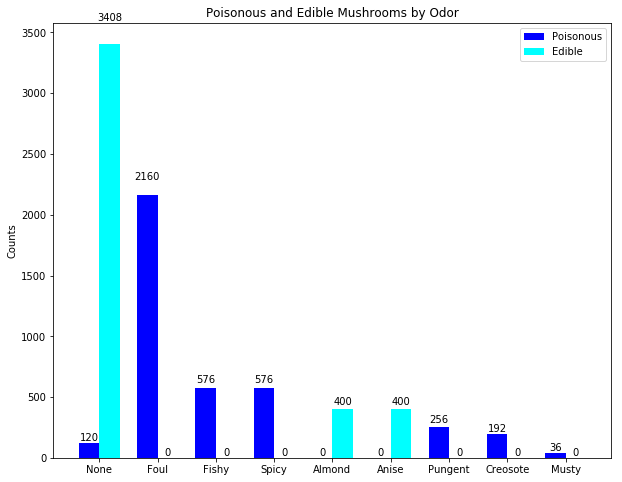

In [316]:
import matplotlib.pyplot as plt
odor_labels = df['odor'].value_counts().axes[0]
edible_o =[]
poi_o = []
N =0
for odor in odor_labels:
    size = len(df[df['odor'] == odor].index)
    edibles = len(df[(df['odor'] == odor) & (df['class'] == 'e')].index)
    edible_o.append(edibles)
    poi_o.append(size-edibles)
    N=N+1

#Plotting
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

rects1 = ax.bar(ind, poi_o, width, color='b')
rects2 = ax.bar(ind + width, edible_o, width, color='cyan')

# Labels and Ticks along the axes.
ax.set_ylabel('Counts')
ax.set_title('Poisonous and Edible Mushrooms by Odor')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('None', 'Foul', 'Fishy', 'Spicy', 'Almond', 'Anise', 'Pungent', 'Creosote', 'Musty'))

ax.legend((rects1[0], rects2[0]), ('Poisonous', 'Edible'))


def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

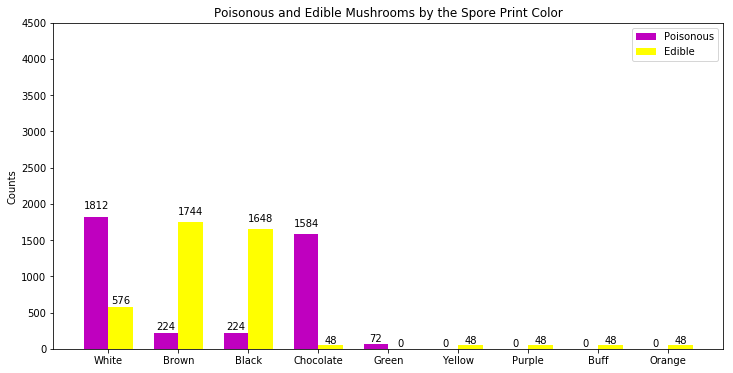

In [315]:
sporecolor_labels = df['spore-print-color'].value_counts().axes[0]

edible_o =[]
poi_o = []
N =0
for spc in sporecolor_labels:
    size = len(df[df['spore-print-color'] == spc].index)
    edibles = len(df[(df['spore-print-color'] == spc) & (df['class'] == 'e')].index)
    edible_o.append(edibles)
    poi_o.append(size-edibles)
    N=N+1
    
#Plotting
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(ind, poi_o, width, color='m')
rects2 = ax.bar(ind + width, edible_o, width, color='yellow')

# Labels and Ticks along the axes.
plt.ylim(0,4500)
ax.set_ylabel('Counts')
ax.set_title('Poisonous and Edible Mushrooms by the Spore Print Color')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('White','Brown','Black','Chocolate','Green','Yellow','Purple','Buff','Orange',))

ax.legend((rects1[0], rects2[0]), ('Poisonous', 'Edible'))


def autolabel(rects):
     #To plot the labels on top of the bars.
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

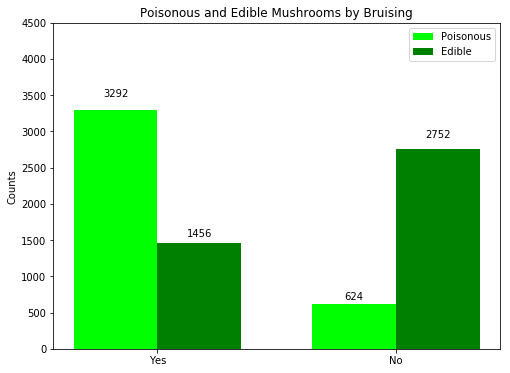

In [317]:
bruises = df['bruises?'].value_counts().axes[0]

edible_o =[]
poi_o = []
N =0
for brus in bruises:
    size = len(df[df['bruises?'] == brus].index)
    edibles = len(df[(df['bruises?'] == brus) & (df['class'] == 'e')].index)
    edible_o.append(edibles)
    poi_o.append(size-edibles)
    N=N+1
    
#Plotting
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))

rects1 = ax.bar(ind, poi_o, width, color='lime')
rects2 = ax.bar(ind + width, edible_o, width, color='g')

# Labels and Ticks along the axes.
plt.ylim(0,4500)
ax.set_ylabel('Counts')
ax.set_title('Poisonous and Edible Mushrooms by Bruising')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Yes','No'))

ax.legend((rects1[0], rects2[0]), ('Poisonous', 'Edible'))


def autolabel(rects):
     #To plot the labels on top of the bars.
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Chart Citation:
- https://www.kaggle.com/patshot/mushroom-classification - https://xkcd.com/color/rgb/

Resources:
- https://datascienceplus.com/mushrooms-classification-part-1/
- https://inmachineswetrust.com/posts/mushroom-classification/
- https://www.kaggle.com/madhurisivalenka/basic-machine-learning-using-mushroom-dataset
- https://www.kaggle.com/patshot/mushroom-classification
- https://towardsdatascience.com/applying-the-universal-machine-learning-workflow-to-the-uci-mushroom-dataset-1939442d44e7